In [2]:
from astropy import units as u
import numpy as np
import math
import matplotlib.pyplot as plt
plt.style.use('bmh')
from astropy.coordinates import SkyCoord,Angle

In [3]:
def parallatic_angle(HA,dec,lat):
    HA=Angle(HA*u.hour).rad
    dec = dec.to(u.rad).value
    lat = lat.to(u.rad).value
    q = np.arctan2(np.sin(HA),(np.cos(dec)*np.tan(lat)-np.sin(dec)*np.cos(HA)))
    return q*u.rad



60.0
60.0
-14.253949192461683 deg


(0.0, 12.0)

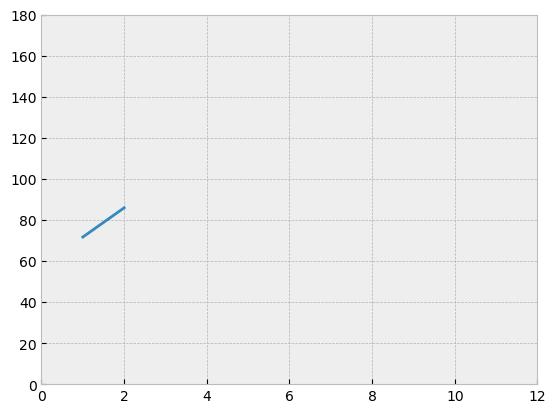

In [4]:
hours=np.linspace(1,2,2)
for i in [-30]*u.deg:
    lat=-24.6272*u.deg
    LHA_below_horizon=np.rad2deg(np.arccos(-np.tan(lat.to(u.rad).value)*np.tan(i.to(u.rad).value)))/15 #Local Hour Angle the target goes below the Horizon
    new_hours=[]
    for hour in hours.copy():

        if (abs(hour) < LHA_below_horizon or str(LHA_below_horizon) == 'nan') and i.value > -90 + lat.value:
            print(i.value+90)
            new_hours.append(hour)
            
    q=parallatic_angle(new_hours,i,lat)
    plt.plot(new_hours,(q.to(u.deg)))
print(np.rad2deg(q[0]-q[1]))
    
plt.ylim(0,180)
plt.xlim(0,12)


AttributeError: 'numpy.ndarray' object has no attribute 'index'